In [3]:
from filterpy.common import kinematic_kf
import numpy as np
from filterpy.kalman import IMMEstimator
import math
from filterpy.kalman import KalmanFilter
import pandas as pd

In [144]:
def state_transition_matrix(v, yaw, T):
    # T = sampling rate, dt
    # yaw = Y Heading = Y component of goal directed unit vector?
    term13 = (-T) * v * math.sin(yaw)
    term14 = T * math.cos(yaw)
    term23 = T * v * math.cos(yaw)
    term24 = T * math.sin(yaw)
    
    state_transition_matrix = np.array([[1, 0, term13, term14],
                                        [0, 1, term23, term24],
                                        [0, 0, 1, 0],
                                        [0, 0, 0, 1]])
    return state_transition_matrix

def direction(current_state, destination_state):
    # math.atan2(targetY-gunY, targetX-gunX)
    # current_state, destination_state = np.array(current_state), np.array(destination_state)
    directions1 = np.linalg.norm((np.array(destination_state) - np.array(current_state)))
    # directions2 = (np.array(destination_state) - np.array(current_state))/directions1
    # directions1 = math.atan2( (destination_state[1] - current_state[1]), (destination_state[0] - current_state[0]))
    # print(directions2[1])
    # directions1 = math.degrees(directions1)
    print(directions1)
    return directions1

In [145]:
test_df_path = "C:/Users/sakif/jupyter projects/thesis_test/modular test/Untitled Folder/eth_data_prepared_normal3.csv"
# delta_t = 0.4

In [146]:
test_df = pd.read_csv(test_df_path, index_col=None)

In [7]:
unique_peds = np.unique(test_df['ped_no'])
dest_all = []
for n in range(len(unique_peds)):
    test_df_indiv2 = test_df.loc[test_df['ped_no'] == unique_peds[n]]
    input_xy_temp2 = np.array(test_df_indiv2[['pos_x', 'pos_y']])
    dest_temp = input_xy_temp2[-1]
    dest_all.append(dest_temp)
dest_all = np.array(dest_all)
# dest_all

In [8]:
import matplotlib.pyplot as plt

In [9]:
len(np.unique(dest_all))/2

354.0

In [10]:
from sklearn.cluster import KMeans

In [564]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(dest_all)
center_points = kmeans.cluster_centers_
center_points

array([[12.65814642,  5.53807136],
       [-2.42247966,  1.8782528 ],
       [ 3.16009339,  5.38515784],
       [-1.67269075,  7.75310654]])

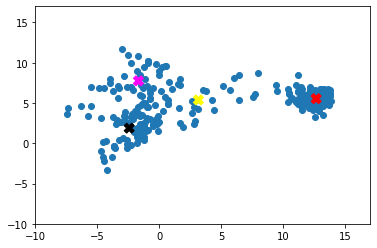

In [565]:
plt.scatter(dest_all[:, 0], dest_all[:, 1])
plt.xlim(-10, 17)
plt.ylim(-10, 17)
plt.scatter(center_points[:, 0], center_points[:, 1], c=["red", "black", "yellow", "magenta"], marker="X", s=100)

In [167]:
# dataframe for individual pedestrian 
test_df_indiv = test_df.loc[test_df['ped_no'] == 3]
# test_df_indiv = test_df_indiv.loc[test_df_indiv['frame_id'] >= 846]

In [168]:
input_xy_temp = np.array(test_df_indiv[["pos_x", "pos_y"]])

In [169]:
len(input_xy_temp)
# len(input_xy_temp[10:])

32

In [170]:
input_xy_temp

array([[12.270674  ,  6.6684218 ],
       [11.936317  ,  6.7666356 ],
       [11.448074  ,  6.9144075 ],
       [10.825832  ,  6.798273  ],
       [10.394153  ,  6.786098  ],
       [ 9.8409209 ,  6.8605842 ],
       [ 9.3564735 ,  6.8511706 ],
       [ 8.9453791 ,  6.7963376 ],
       [ 8.4108856 ,  6.8698696 ],
       [ 7.9486303 ,  6.8577346 ],
       [ 7.435487  ,  6.8070093 ],
       [ 6.9627463 ,  6.8356025 ],
       [ 6.5785424 ,  6.9837562 ],
       [ 6.1391536 ,  7.0110658 ],
       [ 5.741793  ,  7.0778462 ],
       [ 5.385417  ,  7.1424653 ],
       [ 5.0606082 ,  7.0356285 ],
       [ 4.8728741 ,  6.9620065 ],
       [ 4.6003525 ,  7.0212397 ],
       [ 4.4592268 ,  6.9870255 ],
       [ 4.1372352 ,  7.0495087 ],
       [ 3.7568731 ,  6.9862765 ],
       [ 3.4230498 ,  6.9628546 ],
       [ 3.0801567 ,  6.8522932 ],
       [ 2.804071  ,  7.0433753 ],
       [ 2.2372009 ,  7.2976183 ],
       [ 1.7814508 ,  7.1489883 ],
       [ 1.3199598 ,  6.9984861 ],
       [ 0.85964785,

(-10.0, 17.0)

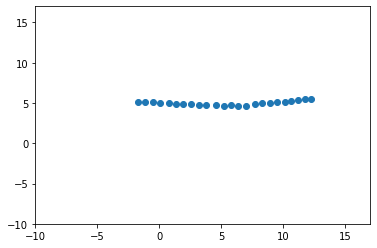

In [157]:
plt.scatter(input_xy_temp[:, 0], input_xy_temp[:, 1])
plt.xlim(-10, 17)
plt.ylim(-10, 17)

In [158]:
"""
start = [2, 10.3]
end_straight = [3, 0.8]
end_left = [-2.8, 5.5]
end_right = [8.3, 5.5]
v = 0.707
delta_t = 0.1
"""
 # sGPS: assume 8.8m/s2 as maximum acceleration, forcing the vehicle
#sCOURSE: assume 0.1rad/s as maximum turn rate for the vehicle
# sVelocity: assume 8.8m/s2 as maximum acceleration, forcing the vehicle
# sYaw: assume 1.0rad/s2 as the maximum turn rate acceleration for the vehicle

'\nstart = [2, 10.3]\nend_straight = [3, 0.8]\nend_left = [-2.8, 5.5]\nend_right = [8.3, 5.5]\nv = 0.707\ndelta_t = 0.1\n'

In [171]:
dest_list = np.array(((-2, 5.8566027), (-6.5902743, 0.065724367), (-6.5553084, 11.867515), (15.10717, 5.5659299), 
                      (3.16009339,  5.38515784)))
# dest_list = center_points
dest_list

array([[-2.        ,  5.8566027 ],
       [-6.5902743 ,  0.06572437],
       [-6.5553084 , 11.867515  ],
       [15.10717   ,  5.5659299 ],
       [ 3.16009339,  5.38515784]])

In [172]:
start = input_xy_temp[0]
# zone1, zone2, zone3, zone4 = [-2, 5.8566027], [-6.5902743, 0.065724367], [-6.5553084, 1.1867515], [15.10717, 5.5659299]
zone1, zone2, zone3, zone4 = dest_list[0], dest_list[1], dest_list[2], dest_list[3]
v, delta_t = 0.707, 0.4

kf1 = KalmanFilter(dim_x=4, dim_z=2)
kf2 = KalmanFilter(dim_x=4, dim_z=2)
kf3 = KalmanFilter(dim_x=4, dim_z=2)
kf4 = KalmanFilter(dim_x=4, dim_z=2)

directions1, directions2, directions3 = direction(start, zone1), direction(start, zone2), direction(start, zone3)
directions4 = direction(start, zone4)

state_transition1 = state_transition_matrix(v, directions1, delta_t)
state_transition2 = state_transition_matrix(v, directions2, delta_t)
state_transition3 = state_transition_matrix(v, directions3, delta_t)
state_transition4 = state_transition_matrix(v, directions4, delta_t)

kf1.F, kf2.F, kf3.F, kf4.F = state_transition1, state_transition2, state_transition3, state_transition4

# define initial state [x, y, yaw, velocity, yaw*dt]
kf1.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions1, v])
kf2.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions2, v])
kf3.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions3, v])
kf4.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions4, v])

sGPS, sCourse, sVelocity = 0.5*8.8*delta_t**2, 2.0 * delta_t, 35.0 * delta_t
temp_q = np.diag([sGPS**2, sGPS**2, sCourse**2, sVelocity**2])
# process noise
kf1.Q, kf2.Q, kf3.Q, kf4.Q = temp_q, temp_q, temp_q, temp_q
# measurement noise
kf1.R, kf2.R, kf3.R, kf4.R = np.identity(2)*36, np.identity(2)*36, np.identity(2)*36, np.identity(2)*36
# Define the covariance matrix.
# Here I take advantage of the fact that P already contains np.eye(dim_x), and just multiply by the uncertainty:
kf1.P *= 10; kf2.P *= 10; kf3.P *= 10; kf4.P *= 10

# define measurement function
kf1.H = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0]])
kf2.H = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0]])
kf3.H = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0]])
kf4.H = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0]])

filters = [kf1, kf2, kf3, kf4]

mu = [0.25, 0.25, 0.25, 0.25] # each filter is equally likely at the start

trans = np.array([[0.85, 0.05, 0.05, 0.05], 
                  [0.05, 0.85, 0.05, 0.05], 
                  [0.05, 0.05, 0.85, 0.05],
                  [0.05, 0.05, 0.05, 0.85]
                 ]) 
# M[i,j] is the probability of switching from filter j to filter i.

imm = IMMEstimator(filters, mu, trans)

14.293746418115887
19.983267604849257
19.5306984879547
3.0432216395756666


In [173]:
len(input_xy_temp)

32

In [174]:
#temp_input_new = np.concatenate((input_xy_temp[0:3], input_xy_temp[8:11], input_xy_temp[16:19], input_xy_temp[24:27]), axis=0)
# temp_input_new

In [175]:
# put some initial input here. Like the trajectory of first one second
for i in range(len(input_xy_temp)):
    # x = interpolated_z[i, 0]
    # y = interpolated_z[i, 1]
    # z = np.array([[x], [y]])
    z = input_xy_temp[i]
    # print(z)
    # print(z.shape)
    
    imm.predict()
    imm.update(z)
    # print(imm.x.T)
    print("iteration ", i, ": ",  "mode: ", imm.mu)
    # print()

iteration  0 :  mode:  [0.25568894 0.22513745 0.22772568 0.29144793]
iteration  1 :  mode:  [0.25117764 0.18104247 0.18642691 0.38135298]
iteration  2 :  mode:  [0.2284525  0.15920921 0.16667929 0.44565899]
iteration  3 :  mode:  [0.21448589 0.16168002 0.16815596 0.45567812]
iteration  4 :  mode:  [0.21101932 0.17365954 0.17952418 0.43579695]
iteration  5 :  mode:  [0.21418813 0.18799778 0.19334226 0.40447182]
iteration  6 :  mode:  [0.21912966 0.20044653 0.20515524 0.37526857]
iteration  7 :  mode:  [0.22387136 0.21026198 0.21431907 0.35154759]
iteration  8 :  mode:  [0.22819589 0.21853864 0.22222851 0.33103696]
iteration  9 :  mode:  [0.23167413 0.22491371 0.22831231 0.31509985]
iteration  10 :  mode:  [0.23445836 0.22983676 0.23293463 0.30277025]
iteration  11 :  mode:  [0.23653586 0.23379147 0.23686628 0.29280639]
iteration  12 :  mode:  [0.23800895 0.2371092  0.24055148 0.28433037]
iteration  13 :  mode:  [0.23912306 0.23967987 0.24341067 0.2777864 ]
iteration  14 :  mode:  [0.239

In [165]:
kf2.F

array([[ 1.        ,  0.        , -0.19193595,  0.29376679],
       [ 0.        ,  1.        ,  0.20769312,  0.27147942],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [619]:
temp_goal = (dest_list[1] - input_xy_temp[0])/np.linalg.norm((dest_list[1] - input_xy_temp[0]))
temp_goal

array([-0.84996266, -0.52684293])

In [620]:
(dest_list[3] - input_xy_temp[0])/np.linalg.norm((dest_list[3] - input_xy_temp[0]))

array([ 0.99169066, -0.12864541])

In [176]:
def state_transition_matrix2(v, yaw, T):
    term13 = (v/yaw) * (-math.cos(yaw) + math.cos(T * yaw + yaw))
    term14 = (-math.sin(yaw) + math.sin(T * yaw + yaw))/yaw
    term15 = T * v * math.cos(T * yaw + yaw)/ yaw - v * (-math.sin(yaw) + math.sin(T * yaw + yaw)) / yaw **2
    term23 = (v/yaw) * (-math.sin(yaw) + math.sin(T * yaw + yaw))
    term24 = (math.cos(yaw) - math.cos(T * yaw + yaw)) / yaw
    term25 = T * v * math.sin(T * yaw + yaw)/ yaw - v * (math.cos(yaw) - math.cos(T * yaw + yaw)) / yaw **2
    state_transition_matrix = np.array([[1, 0, term13, term14, term15],
                                        [0, 1, term23, term24, term25],
                                        [0, 0, 1, 0, T],
                                        [0, 0, 0, 1, 0],
                                        [0, 0, 0, 0, 1]])
    return state_transition_matrix

In [177]:
# 5 zones
start = input_xy_temp[0]
# zone1, zone2, zone3, zone4 = [-2, 5.8566027], [-6.5902743, 0.065724367], [-6.5553084, 1.1867515], [15.10717, 5.5659299]
zone1, zone2, zone3, zone4, zone5 = dest_list[0], dest_list[1], dest_list[2], dest_list[3], dest_list[4]
v, delta_t = 0.707, 0.4

kf1 = KalmanFilter(dim_x=5, dim_z=2)
kf2 = KalmanFilter(dim_x=5, dim_z=2)
kf3 = KalmanFilter(dim_x=5, dim_z=2)
kf4 = KalmanFilter(dim_x=5, dim_z=2)
kf5 = KalmanFilter(dim_x=5, dim_z=2)

directions1, directions2, directions3 = direction(start, zone1), direction(start, zone2), direction(start, zone3)
directions4, directions5 = direction(start, zone4), direction(start, zone5)

state_transition1 = state_transition_matrix2(v, directions1, delta_t)
state_transition2 = state_transition_matrix2(v, directions2, delta_t)
state_transition3 = state_transition_matrix2(v, directions3, delta_t)
state_transition4 = state_transition_matrix2(v, directions4, delta_t)
state_transition5 = state_transition_matrix2(v, directions5, delta_t)

kf1.F, kf2.F, kf3.F, kf4.F = state_transition1, state_transition2, state_transition3, state_transition4
kf5.F = state_transition5

# define initial state [x, y, yaw, velocity, yaw*dt]
kf1.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions1, v, directions1*delta_t])
kf2.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions2, v, directions2*delta_t])
kf3.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions3, v, directions3*delta_t])
kf4.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions4, v, directions4*delta_t])
kf5.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions4, v, directions4*delta_t])

sGPS, sCourse, sVelocity, sYaw = 0.5*8.8*delta_t**2, 0.1*delta_t, 8.8*delta_t, 1.0*delta_t
temp_q = np.diag([sGPS**2, sGPS**2, sCourse**2, sVelocity**2, sYaw**2])
# process noise
kf1.Q, kf2.Q, kf3.Q, kf4.Q, kf5.Q = temp_q, temp_q, temp_q, temp_q, temp_q
# measurement noise
kf1.R, kf2.R, kf3.R, kf4.R = np.identity(2)*5, np.identity(2)*5, np.identity(2)*5, np.identity(2)*5
kf5.R = np.identity(2)*5
# Define the covariance matrix.
# Here I take advantage of the fact that P already contains np.eye(dim_x), and just multiply by the uncertainty:
kf1.P *= 10; kf2.P *= 10; kf3.P *= 10; kf4.P *= 10; kf5.P *= 10

# define measurement function
kf1.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0, 0.0]])
kf2.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0, 0.0]])
kf3.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0, 0.0]])
kf4.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0, 0.0]])
kf5.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0, 0.0]])

filters = [kf1, kf2, kf3, kf4, kf5]

mu = [0.20, 0.20, 0.20, 0.20, 0.20] # each filter is equally likely at the start

trans = np.array([[0.80, 0.05, 0.05, 0.05, 0.05], 
                  [0.05, 0.80, 0.05, 0.05, 0.05], 
                  [0.05, 0.05, 0.80, 0.05, 0.05],
                  [0.05, 0.05, 0.05, 0.80, 0.05],
                  [0.05, 0.05, 0.05, 0.05, 0.80]
                 ]) 
# M[i,j] is the probability of switching from filter j to filter i.

imm = IMMEstimator(filters, mu, trans)

14.293746418115887
19.983267604849257
19.5306984879547
3.0432216395756666
9.200513324936976


In [178]:
# put some initial input here. Like the trajectory of first one second
for i in range(len(input_xy_temp)):
    # x = interpolated_z[i, 0]
    # y = interpolated_z[i, 1]
    # z = np.array([[x], [y]])
    z = input_xy_temp[i]
    # print(z)
    # print(z.shape)
    
    imm.predict()
    imm.update(z)
    # print(imm.x.T)
    print("iteration ", i, ": ",  "mode: ", imm.mu)
    # print()

iteration  0 :  mode:  [0.21244446 0.20546764 0.20669427 0.17527816 0.20011547]
iteration  1 :  mode:  [0.24480979 0.22875573 0.23541392 0.11139972 0.17962084]
iteration  2 :  mode:  [0.27412139 0.25473385 0.27391618 0.06295219 0.13427639]
iteration  3 :  mode:  [0.27633452 0.27941051 0.30691643 0.04063033 0.09670821]
iteration  4 :  mode:  [0.27307876 0.29117433 0.32550147 0.03041175 0.07983369]
iteration  5 :  mode:  [0.26282259 0.29936636 0.34193029 0.02534418 0.07053658]
iteration  6 :  mode:  [0.25651612 0.30368007 0.34965239 0.02367409 0.06647733]
iteration  7 :  mode:  [0.25869374 0.30399275 0.3481564  0.0237588  0.06539831]
iteration  8 :  mode:  [0.25809585 0.30454819 0.34955944 0.02385575 0.06394077]
iteration  9 :  mode:  [0.26051076 0.30349818 0.34709594 0.02481283 0.06408229]
iteration  10 :  mode:  [0.26227603 0.3033922  0.34406985 0.02597672 0.06428519]
iteration  11 :  mode:  [0.26598503 0.3013511  0.34035279 0.02694763 0.06536344]
iteration  12 :  mode:  [0.27416382 0.

In [727]:
kf_test = kinematic_kf(dim=2, order=2, dt=0.4, order_by_dim=False)

In [728]:
kf_test.F

array([[1.  , 0.  , 0.4 , 0.  , 0.08, 0.  ],
       [0.  , 1.  , 0.  , 0.4 , 0.  , 0.08],
       [0.  , 0.  , 1.  , 0.  , 0.4 , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.4 ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [729]:
np.linalg.norm((np.array((12, 5)) - np.array((8, 3))))

4.47213595499958

In [743]:
tt = (np.array((-1.5219591, 6.0516812)) - np.array((13, 5.8)))
tt

array([-14.5219591,   0.2516812])

In [744]:
np.arccos(tt)

c:\users\sakif\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


array([       nan, 1.31637935])

In [745]:
np.linalg.norm(tt)

14.524139889456665

In [736]:
np.sqrt((0.89442719**2 + 0.4472136**2))

1.000000001118128